#Bifurcation


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sympy as sp

#%matplotlib inline

The functions defined earlier. 

Notice, we have added the possibility to pass arguments to the solver. 

In [2]:
def plot_flow(ax,rhs,xrange=[-2.5,2.5],yrange=[-2.5,2.5],xnum=100,ynum=100,nullclines=False,args=None):

    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0,np.array([uu[i,j], vv[i,j]]),args)


# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
# def plot_solution(ax,rhs,y0,t_end,t_dim=2000,color='green',init_pt=True,linewidth=2.5):

#     t = np.linspace(0, t_end, t_dim)
#     X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t)
#     x,y=X.y
#     t=X.t
#     ax.plot(x,y, color=color,linewidth=linewidth)
#     if (init_pt):
#         ax=plot_point(ax,y0,color=color)
#     return ax

def get_solution(rhs, y0, t_end, t_dim=2000,args=None):
    t = np.linspace(0, t_end, t_dim)
    sol = sc.integrate.solve_ivp(rhs, t_span=[t[0], t[-1]], y0=y0, t_eval=t,args=args)
    return sol

def plot_solution(ax, rhs, y0, t_end, t_dim=2000, color='green', init_pt=True, linewidth=2.5, linestyle='-',args=None):
    sol = get_solution(rhs, y0, t_end, t_dim,args)
    x, y = sol.y
    ax.plot(x, y, color=color, linewidth=linewidth,linestyle=linestyle)
    if init_pt:
        ax = plot_point(ax, y0, color=color)
    return ax

def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax


def jacobian(rhs, xy, eps=1e-8,args=None):
    """
    Compute the Jacobian matrix of a system of differential equations at a given point.
    Parameters:
    rhs (function): The right-hand side function of the differential equations. It should take two arguments: time (t) and state (xy).
    xy (array-like): The point (x, y) at which to evaluate the Jacobian.
    eps (float, optional): A small perturbation value for numerical differentiation. Default is 1e-8.
    Returns:
    numpy.ndarray: A 2x2 Jacobian matrix evaluated at the point (x, y).
    Note:
    This function uses finite differences to approximate the partial derivatives.

    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    
    f0 = np.array(rhs(0, xy,args))
    jac = np.zeros((2, 2))
    
    for i in range(2):
        dxy = np.zeros(2)
        dxy[i] = eps
        f1 = np.array(rhs(0, xy + dxy,args))
        jac[:, i] = (f1 - f0) / eps
    
    return jac

def eigenvalues_eigenvectors(jac):
    """
    Calculate the eigenvalues and eigenvectors of a given Jacobian matrix.
    Parameters:
    jac (numpy.ndarray): A square matrix representing the Jacobian matrix.
    Returns:
    tuple: A tuple containing two elements:
        - eigenvalues (numpy.ndarray): An array of eigenvalues.
        - eigenvectors (numpy.ndarray): An array of eigenvectors, where each column is an eigenvector corresponding to the eigenvalue at the same index.


    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    eigenvalues, eigenvectors = np.linalg.eig(jac)
    return eigenvalues, eigenvectors





def plot_jordan(ax,rhs,r0=[0,0],rr=1,num=25,vectors=True, color='blue',linewidth=1.5,linestyle='dashed',args=None):
    theta=np.linspace(0,2*np.pi, num)
    x=rr*np.cos(theta)+r0[0]
    y=rr*np.sin(theta)+r0[1]
    ax.plot(x,y,linewidth=linewidth, color=color)
    if vectors:
        U,V=rhs(0,[x,y],args)
        ax.quiver(x,y,U,V)

    return ax




def winding_number(rhs, r0, rr, num=1000,args=None):
    theta = np.linspace(0, 2 * np.pi, num)
    x = rr * np.cos(theta) + r0[0]
    y = rr * np.sin(theta) + r0[1]
    
    F,G=rhs(0,[x,y],args)
    angles = np.arctan2(G, F)
    integrated_angle = np.sum(np.diff(np.unwrap(angles)))
    
    return integrated_angle / (2 * np.pi)



In [18]:
def plot_func(mu): # This function calculates the 
    fig, ax = plt.subplots(1, 1, figsize=(4, 4)) 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    #ax.set_aspect('equal')
    xrange=[-2,2]
    x=np.linspace(xrange[0],xrange[1],100)

    y= f_numeric(x,mu) # The function
    for i in range(0, len(x), 5):
        ax.arrow(x[i], 0,  np.sign(y[i])*0.1,0, head_width=0.2, head_length=0.1, fc='red', ec='red')
    
    ax.plot(x,y)
    ax.set_title(f'{func}')
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(0, color='black', linewidth=.5)
    ax.set_ylim([-5,5])
    plt.show()
    
    



from scipy.optimize import fsolve
def bifurcation_diagram(f_numeric, dfdx_numeric, mu_values):
    # Initialize lists to store the fixed points
    fixed_points = []

    # Find the fixed points for each value of mu
    for mu_val in mu_values:
        # Define the function to find the roots
        func_numeric = lambda x: f_numeric(x, mu_val)
        
        # Find the roots using a numerical solver
        roots = fsolve(func_numeric, [-2, 2])
        
        # Store the roots
        fixed_points.append(roots)

    # Convert the fixed points to a numpy array for plotting
    fixed_points = np.array(fixed_points, dtype=float)
    
    # Determine the stability of the fixed points
    stability = []
    for mu_val, roots in zip(mu_values, fixed_points):
        stability_mu = []
        for root in roots:
            jacobian_val = dfdx_numeric(root, mu_val)
            if jacobian_val < 0:
                stability_mu.append('stable')
            else:
                stability_mu.append('unstable')
        stability.append(stability_mu)

    # Plot the bifurcation diagram with stability
    plt.figure(figsize=(5, 3))
    for i in range(fixed_points.shape[1]):
        stable_points = np.array([fixed_points[j, i] for j in range(len(stability)) if stability[j][i] == 'stable'])
        unstable_points = np.array([fixed_points[j, i] for j in range(len(stability)) if stability[j][i] == 'unstable'])
        stable_mu = np.array([mu_values[j] for j in range(len(stability)) if stability[j][i] == 'stable'])
        unstable_mu = np.array([mu_values[j] for j in range(len(stability)) if stability[j][i] == 'unstable'])
        plt.plot(stable_mu, stable_points, 'b', lw=2, label='Stable' if i == 0 else "")
        plt.plot(unstable_mu, unstable_points, 'r', lw=2, label='Unstable' if i == 0 else "")

    plt.xlabel(r'$\mu$')
    plt.ylabel('Fixed Points')
    plt.title('Bifurcation Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()


## Bifurcation in 1D


Look at the following 1D problems with a parameter $\mu$: 
$$ \begin{array}{rcl}
\dot{x} &=& \mu + x^2 \\
\dot{x} &=& \mu - x^2 \\
\dot{x} &=& \mu x - x^3 \\
\dot{x} &=& \mu x + x^3 \\
\dot{x} &=& \mu x + x^3 + x^5 
\end{array}
$$

Plot the right hand side of the problems for different values of $\mu$. Based on this, find the fixed point (also called critical points, equilibrium points) and determine their stabilities. 

A first example below. 

<font color='green'> Can you draw a bifurcation diagram for each of the functions? <font>

In [22]:
# Using sympy
# Define symbolic variables
x, mu = sp.symbols('x mu')

# Define the function dxdt = f(x, r)
func = mu + x**2      # Change this line to change the function

# Compute its derivative df/dx
dfdx = sp.diff(func, x)

# Convert symbolic function to numerical functions
f_numeric = sp.lambdify((x, mu), func, 'numpy')
dfdx_numeric = sp.lambdify((x, mu), dfdx, 'numpy')
w = interactive(plot_func, mu=(-1, 1, 0.1))
#w.layout.width = 'auto'
#w.layout.height = 'auto'
w.children[0].value = 0.
w

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0), Output()), _dom_classes=('w…

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_95638/1605345184.py:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  roots = fsolve(func_numeric, [-2, 2])
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_95638/1605345184.py:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  roots = fsolve(func_numeric, [-2, 2])


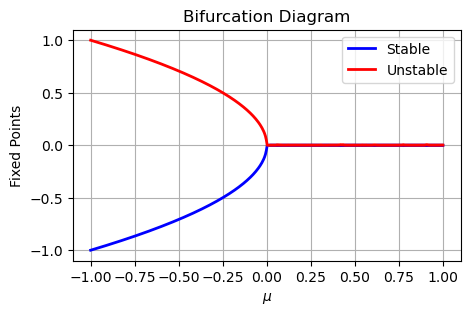

In [15]:
mu_values = np.linspace(-1, 1, 400)
bifurcation_diagram(f_numeric, dfdx_numeric, mu_values)

## 2D

**Definition 1. on p 164**
 A vector field $f \in R^2$, which is continuously differentiable, is called structurally stable if small perturbations in the system $\dot{\bf x} = {\bf f} ({\bf x})$ leave the qualitative behavior unchanged. If small perturbations cause a change in the qualitative behavior of the system, then f is called structurally unstable.

**Peixoto’s Theorem in the Plane.** (p164) Let the vector field $\bf f$ be continuously differentiable on a compact set, say, _D_. Then $\bf f$ is structurally stable on _D_ if and only if  
- the number of critical points and limit cycles is finite and each is hyperbolic;  
-  there are no trajectories connecting saddle points to saddle points.



### Examples
Look at the following 2D problems: 
$$ \begin{array}{rclrcll}

\dot{x} &=& \mu - x^2 & \dot{y} &=&-y \hspace{1cm}  & {Saddle \ node}\\ 
\dot{x} &=& \mu x - x^2 & \dot{y} &=&-y & {Transcritical}\\ 
\dot{x} &=& \mu x - x^3 & \dot{y} &=&-y & {Supercritical \ pitchfork}\\ 
\dot{x} &=& \mu x + x^3 & \dot{y} &=&-y & {Subcritical \ pitchfork}\\ 

\dot{x} &=& (\mu- (x^2 + y^2))x-y & \dot{y} &=&(\mu- (x^2 + y^2))y+x & {Supercritical \ Hopf}\\ 
\end{array}
$$

Plot the flow for different values of the parameter $\mu$.

The functions evaluating the right hand side are given below. 


In [80]:
def rhs_sn(t,xy,mu=-1):
    x,y=xy
    dx=mu-x**2
    dy=-y
    return [dx,dy]

def rhs_transcrit(t,xy,mu=-1):
    x,y=xy
    dx=mu*x-x**2
    dy=-y
    return [dx,dy]

def rhs_super_pitch(t,xy,mu=-1):
    x,y=xy
    dx=mu*x-x**3
    dy=-y
    return [dx,dy]

def rhs_sub_pitch(t,xy,mu=-1):
    x,y=xy
    dx=mu*x+x**3
    dy=-y
    return [dx,dy]

def rhs_sup_hopf(t,xy,mu=-1):
    x,y=xy
    dx=(mu-(x**2+y**2))*x-y
    dy=(mu-(x**2+y**2))*y+x
    return [dx,dy]


## Saddle node bifurcation


In [90]:
rhs=rhs_sub_pitch
def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    ax=plot_flow(ax,rhs,xrange=[-2,2],yrange=[-2,2],nullclines=True,  args=mu)
    ax=plot_solution(ax,rhs,[0,2],t_end=10, color='green', init_pt=True, linewidth=2.5,args=[mu])
    ax=plot_solution(ax,rhs,[1,2],t_end=10, color='red', init_pt=True, linewidth=2.5,args=[mu])
    ax=plot_solution(ax,rhs,[-1,2],t_end=10, color='green', init_pt=True, linewidth=2.5,args=[mu])
    ax=plot_solution(ax,rhs,[-0.5,2],t_end=10, color='green', init_pt=True, linewidth=2.5,args=[mu])

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    plt.show()
w=interactive(plot_func, mu=(-1,1,0.05))
w.children[0].value = 1
w

interactive(children=(FloatSlider(value=1.0, description='mu', max=1.0, min=-1.0, step=0.05), Output()), _dom_…

<font color='green'> Investigate the other functions. <font>

# Hopf bifurcation
## Super critical Hopf bifurcation
A stable spiral becomes an unstable spiral with a stable limit cycle in the surrounding. 

$$ \begin{array}{rcl}
\dot{x} &=& (\mu - (x^2+y^2))x-y \\
\dot{y} &=&(\mu-(x^2+y^2))y+x \\ 
\end{array}
$$
Origin is an equilibrium point. 

Linear stability analysis gives eigenvalues $\lambda=\mu\pm i$. <font color='green'>
Show this.</font>. Indicating a center at $\mu=0$.

In polar coordinates <font color='green'>
Show this also.</font>
$$ \begin{array}{rcl}

\dot{r} &=& \mu r - r^3 = r(\mu-r^2) \\
\dot{\theta} &=&-1 \\ 

\end{array}
$$

We recognize the equilibrium point in r=0, and a limit cycle at $r=\sqrt{\mu}$.



Use the slider in the figure below to see how the two limit cycles occur, how the unstable inner collide with the stable origin, making it unstable. 

In [91]:
def rhs_sup_hopf(t,xy,mu=-1): # Define the right hand side.
    # In order to use the phase_portraits.py file we need to be in the (x,y) coordinates. 
    x,y=xy
    dx=(mu-(x**2+y**2))*x-y 
    dy= (mu-(x**2+y**2))*y+x 
    return [dx,dy]
def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    
    rrange=0.5
    ax=plot_flow(ax,rhs_sup_hopf,xrange=[-rrange,rrange],yrange=[-rrange,rrange],nullclines=False,  args=mu) # This plots the flow
    ax=plot_solution(ax,rhs_sup_hopf,y0=[0.01,0.],t_end=100,t_dim=2000,color='green',init_pt=False,linewidth=2.5,args=[mu]) # In these two lines we plot two paths
    ax=plot_solution(ax,rhs_sup_hopf,y0=[0.5,0.],t_end=100,t_dim=2000,color='orange',init_pt=False,linewidth=1.5,args=[mu]) # change y0 to plot others. 
    ax.set_xlim([-rrange, rrange])
    ax.set_ylim([-rrange, rrange])
    if mu<=0:
        ax.set_title(f'Stable spiral at r=0')
    else:
        ax.set_title(f'Limit cycles at r={np.sqrt(mu):.2f}')
    plt.show()
w=interactive(plot_func, mu=(-0.5,0.5,0.05))

w.children[0].value = -0.5  # Set the start value for mu
w

interactive(children=(FloatSlider(value=-0.5, description='mu', max=0.5, min=-0.5, step=0.05), Output()), _dom…


## Subcritical Hopf
This problem is given in polar coordinates. So $x=r cos(\theta)$ and $y=r sin(\theta)$, where $r$ is the distance from origo and $theta$ is the angle between the position vector and the positive $x€-axis. 

$$ \begin{array}{rcl}

\dot{r} &=& \mu r + r^3 - r^5 \\
\dot{\theta} &=&-1 \\ 

\end{array}
$$

When $\dot{r}=0$ the paths will have constant distance, $r$, to origin. This happens when 
$$
 -r(r-r_{-})(r-r_{+})=0
$$
where 
$$
\begin{array}{rclcl}
 r &=& 0 \\
 r &=& r_{-} &=& \sqrt{\frac{1}{2}\left(1-\sqrt{1+4\mu} \right)} \\
 r &=& r_{+} &=& \sqrt{\frac{1}{2}\left(1+\sqrt{1+4\mu} \right)}\\
\end{array}
$$

Use the slider in the figure below to see how the two limit cycles occur, how the unstable inner collide with the stable origin, making it unstable. 

In [93]:
def rhs_sub_hopf(t,xy,mu=-1): # Define the right hand side.
    # In order to use the phase_portraits.py file we need to be in the (x,y) coordinates. 
    x,y=xy
    r=np.sqrt(x**2+y**2) # Calculate the distance from origo.
    theta=np.arctan2(y,x) # Calculate theta.
    dr= mu*r+r**3-r**5 # calculate dr/dt.
    dtheta= -1 # Calculate d theta/dt.
    dx=dr*np.cos(theta)-r*dtheta*np.sin(theta) # Find dx/dt.
    dy=dr*np.sin(theta)+r*dtheta*np.cos(theta) # and dy/dt.
    return [dx,dy]


In [94]:
def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    
    rrange=1.5
    ax=plot_flow(ax,rhs_sub_hopf,xrange=[-rrange,rrange],yrange=[-rrange,rrange],nullclines=False,  args=mu) # This plots the flow
    ax=plot_solution(ax,rhs_sub_hopf,y0=[0.1,0.],t_end=100,t_dim=2000,color='green',init_pt=False,linewidth=2.5,args=[mu]) # In these two lines we plot two paths
    ax=plot_solution(ax,rhs_sub_hopf,y0=[1.9,0.],t_end=100,t_dim=2000,color='orange',init_pt=False,linewidth=1.5,args=[mu]) # change y0 to plot others. 
    r_plus=0
    r_minus=0
    if (mu >= -0.25): # Check if we get imaginary values for the innermost square root. 
        r_plus=np.sqrt(0.5+0.5*np.sqrt(1+4*mu))
        if ((0.5-0.5*np.sqrt(1+4*mu))>=0): # Check if the outer square root gives an imaginary number, i.e the inner limit cycle doesn't exist.
            r_minus=np.sqrt(0.5-0.5*np.sqrt(1+4*mu))
            ax=plot_jordan(ax,rhs_sub_hopf,r0=[0,0],rr=r_minus,num=25,vectors=False, color='blue',linewidth=2.5,linestyle='dashed',args=[mu]) # Jordan curve for the outer limit cycle. 
            ax=plot_solution(ax,rhs_sub_hopf,y0=[r_minus+0.01,0.],t_end=100,t_dim=2000,color='blue',init_pt=False,linewidth=1.,args=[mu])
            ax=plot_solution(ax,rhs_sub_hopf,y0=[r_minus-0.01,0.],t_end=100,t_dim=2000,color='blue',init_pt=False,linewidth=1.,args=[mu])
        ax=plot_jordan(ax,rhs_sub_hopf,r0=[0,0],rr=r_plus,num=25,vectors=False, color='orange',linewidth=2.5,args=[mu]) # Jordan curve for the outer limit cycle. 
    ax.set_xlim([-rrange, rrange])
    ax.set_ylim([-rrange, rrange])
    ax.set_title(f'Limit cycles at r$_-$={r_minus:.2f} and r$_+$={r_plus:.2f}')
    plt.show()
w=interactive(plot_func, mu=(-1,1,0.05))

w.children[0].value = 0.25  # Set the start value for mu
w

interactive(children=(FloatSlider(value=0.25, description='mu', max=1.0, min=-1.0, step=0.05), Output()), _dom…

# Infinite period bifurcation
Look at the following system given in polar coordinates. 
$$
\dot{r}=r(1-r^2) \\
\dot{\theta}=\mu-\sin(\theta)
$$

<font color='green'> Does the system have any equilibrium points? If so, are they stable?

How about limit cycles?</font> 



In [95]:
def rhs_inf_period(t,xy,mu=-1): # Define the right hand side.
    # In order to use the phase_portraits.py file we need to be in the (x,y) coordinates. 
    x,y=xy
    r=np.sqrt(x**2+y**2) # Calculate the distance from origo.
    theta=np.arctan2(y,x) # Calculate theta.
    dr= r*(1-r**2) # calculate dr/dt.
    dtheta= mu-np.sin(theta) # Calculate d theta/dt.
    dx=dr*np.cos(theta)-r*dtheta*np.sin(theta) # Find dx/dt.
    dy=dr*np.sin(theta)+r*dtheta*np.cos(theta) # and dy/dt.
    return [dx,dy]

def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    rrange=1.5

    ax=plot_flow(ax,rhs_inf_period,xrange=[-rrange,rrange],yrange=[-rrange,rrange],nullclines=False,  args=mu) # This plots the flow
    ax=plot_solution(ax,rhs_inf_period,y0=[0.,0.01],t_end=100,t_dim=2000,color='green',init_pt=True,linewidth=2.5,args=[mu]) # In these two lines we plot two paths
    
    if mu <=1 and mu>=-1:
        theta_0 = np.arcsin(mu)
        theta_1 = np.pi-theta_0
        
        x1=np.cos(theta_1+0.01)
        y1=np.sin(theta_1+0.01)
        ax=plot_solution(ax,rhs_inf_period,y0=[x1,y1],t_end=100,t_dim=2000,color='orange',init_pt=True,linewidth=1.5,args=[mu]) # change y0 to plot others. 
        x1=np.cos(theta_1-0.01)
        y1=np.sin(theta_1-0.01)
        ax=plot_solution(ax,rhs_inf_period,y0=[x1,y1],t_end=100,t_dim=2000,color='orange',init_pt=True,linewidth=1.5,args=[mu])
        x1=1.01*np.cos(theta_1)
        y1=1.01*np.sin(theta_1)
        ax=plot_solution(ax,rhs_inf_period,y0=[x1,y1],t_end=-100,t_dim=2000,color='orange',init_pt=True,linewidth=1.5,args=[mu])
        x1=0.99*np.cos(theta_1)
        y1=0.99*np.sin(theta_1)
        ax=plot_solution(ax,rhs_inf_period,y0=[x1,y1],t_end=-100,t_dim=2000,color='orange',init_pt=True,linewidth=1.5,args=[mu]) 
        x0=np.cos(theta_0+0.01)
        y0=np.sin(theta_0+0.01)
        ax=plot_solution(ax,rhs_inf_period,y0=[x0,y0],t_end=-100,t_dim=2000,color='red',init_pt=True,linewidth=1.5,args=[mu])# change y0 to plot others. 
    else:
        x1=1*np.cos(np.pi/2+0.01)
        y1=1*np.sin(np.pi/2+0.01)
        ax=plot_solution(ax,rhs_inf_period,y0=[x1,y1],t_end=500,t_dim=2000,color='orange',init_pt=True,linewidth=1.5,args=[mu]) # change y0 to plot others. 

    ax.set_xlim([-rrange, rrange])
    ax.set_ylim([-rrange, rrange])
    plt.show()
w=interactive(plot_func, mu=(-1.5,1.5,0.05))

w.children[0].value = 1.5  # Set the start value for mu
w

interactive(children=(FloatSlider(value=1.5, description='mu', max=1.5, min=-1.5, step=0.05), Output()), _dom_…

## Example 4 on P 177
$$

\dot{x} = x (1 − x^2 − y^2) − y(1 + \gamma + x)\\
\dot{y} = y (1 − x^2 − y^2) + x(1 + \gamma + x)

$$

In [96]:
def rhs_example4(t,xy,mu=-1): # Define the right hand side.
    # In order to use the phase_portraits.py file we need to be in the (x,y) coordinates. 
    x,y=xy
    
    dx=x*(1-x**2-y**2) - y*(1+mu+x) # Find dx/dt.
    dy=y*(1-x**2-y**2) + x*(1+mu+x) # and dy/dt.
    return [dx,dy]

def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    rrange=2.5

    ax=plot_flow(ax,rhs_example4,xrange=[-rrange,rrange],yrange=[-rrange,rrange],nullclines=False,  args=mu) # This plots the flow
    print(-1-mu)
    if mu <= 0 and mu >= -2:   
        A =  np.arccos(-1-mu)   
        plot_point(ax, [np.cos(A), np.sin(A)], color='black', markersize=20)
        
        plot_point(ax, [np.cos(-A), np.sin(-A)], color='black', markersize=20)
        
    ax=plot_solution(ax,rhs_example4,y0=[0.01,0.],t_end=100,t_dim=2000,color='green',init_pt=False,linewidth=2.5,args=[mu])
        
    
    
    ax.set_xlim([-rrange, rrange])
    ax.set_ylim([-rrange, rrange])
    plt.show()
w=interactive(plot_func, mu=(-2.5,1.5,0.05))

w.children[0].value = 1.5  # Set the start value for mu
w

interactive(children=(FloatSlider(value=1.5, description='mu', max=1.5, min=-2.5, step=0.05), Output()), _dom_…

## Exercise 5
From the phase plane exercises.
Given the following system in polar coordinates:
$$
\begin{array}{rl}
 \dot{r} = & r(1-r^2)+ \mu r \cos(\theta)\\[0.5pt]
 \dot{\theta} = & 1
\end{array}
$$

In [99]:
def rhs_5_polar(t,rtheta,mu=1):
    r,theta=rtheta
    dr= r*(1-r**2)+mu*r*np.cos(theta)
    dtheta= 1
    return [dr,dtheta]


def rhs_5(t,xy,mu=1):
    x,y=xy
    r=np.sqrt(x**2+y**2)
    theta=np.arctan2(y,x)
    dr, dtheta=rhs_5_polar(t,[r,theta],mu)
    dx=dr*np.cos(theta)-r*np.sin(theta)*dtheta
    dy=dr*np.sin(theta)+r*np.cos(theta)*dtheta
    return [dx,dy]

  # the coordinates for the centre of the circle

def plot_func(mu):
  fig, ax = plt.subplots(1, 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_aspect('equal')

  rrange=2
  ax=plot_flow(ax,rhs_5,xrange=[-rrange,rrange],yrange=[-rrange,rrange],nullclines=False,args=mu) # This plots the flow
  if mu <= 1:
    plot_jordan(ax,rhs_5,r0=[0,0],rr=0.99*np.sqrt(1-mu),num=25,vectors=True, color='blue',linewidth=1.5,args=mu)
  plot_jordan(ax,rhs_5,r0=[0,0],rr=1.01*np.sqrt(1+mu),num=25,vectors=True, color='blue',linewidth=1.5,args=mu)
  plot_solution(ax,rhs_5,[0.01,0.1],t_end=10,color='green',init_pt=True,linewidth=2.5,args=[mu])
  plot_solution(ax,rhs_5,[1.5,1.5],t_end=10,color='orange',init_pt=True,linewidth=2.5,args=[mu])
  plt.show()
#plot_jordan(ax,rhs_2,r0=[0,0],rr=2*np.pi,num=25,vectors=True, color='blue',linewidth=1.5)
#plot_jordan(ax,rhs_2,r0=[0,0],rr=3*np.pi,num=25,vectors=True, color='blue',linewidth=1.5)
w=interactive(plot_func, mu=(-1.5,1.5,0.05))

w.children[0].value = 0  # Set the start value for mu
w


interactive(children=(FloatSlider(value=0.0, description='mu', max=1.5, min=-1.5, step=0.05), Output()), _dom_…